In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv(r"/Users/frieda/Desktop/schulich/5110/data_set_hackathon.csv")


In [3]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001
...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003


In [4]:
from datetime import datetime
import pandas as pd
def convert_date_format(original_date):
    original_format = "%d.%m.%Y"
    parsed_date = datetime.strptime(original_date, original_format)
    new_format = "%Y-%m-%d"
    formatted_date = parsed_date.strftime(new_format)
    return formatted_date

# Apply the function to the specified columns
df['order_date'] = df['order_date'].apply(convert_date_format)
df['requested_delivery_date'] = df['requested_delivery_date'].apply(convert_date_format)

# Display the modified DataFrame
print(df)

      order_date requested_delivery_date Customer Country Code Product Code  \
0     2009-07-13              2010-01-28                    RU    L10705000   
1     2009-07-15              2010-03-24                    RU    L10705000   
2     2009-07-16              2010-02-04                    RU    L10705000   
3     2009-07-17              2010-02-04                    RU    L10705000   
4     2009-07-21              2010-02-01                    RU    L10705000   
...          ...                     ...                   ...          ...   
2415  2011-07-13              2012-02-15                    HR    L12919200   
2416  2011-07-13              2012-02-15                    HR    L12919200   
2417  2011-07-13              2012-02-15                    HR    L12919200   
2418  2011-07-13              2012-02-15                    HR    L12919200   
2419  2012-01-23              2012-04-15                    RU    L12919200   

                      Description order_type  Custo

In [5]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Calculate the time difference in days
df['Time Difference'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [6]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1


In [7]:
df['items'].replace('\\N', 0, inplace=True)
df['items'] = pd.to_numeric(df['items'])

In [8]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int64         
dtypes: datetime64[ns](2), float64(1), 

In [10]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')

### DELIVERY IN Autumn and  Feb to Apr

In [11]:
df['value'].fillna(0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int64         
dtypes: datetime64[ns](2), float64(1), 

### Delivery in Aug and Sep, and Feb to Apr

<Figure size 1200x600 with 0 Axes>

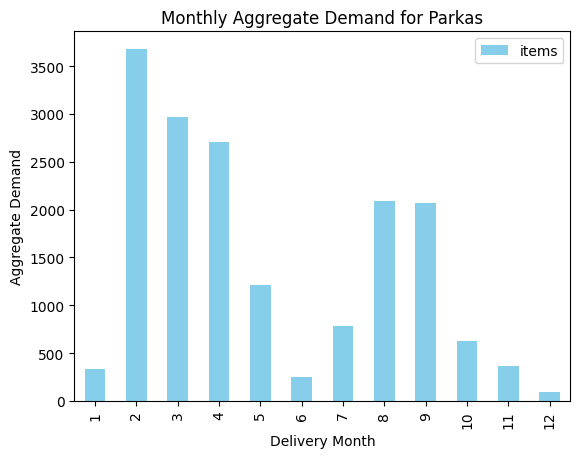

In [13]:
# Aggregate Demand
# By month
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand = df.groupby('DELIVERY_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand.plot(kind='bar', x='DELIVERY_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Aggregate Demand')
plt.show()


### Make orders in SUMMER

<Figure size 1200x600 with 0 Axes>

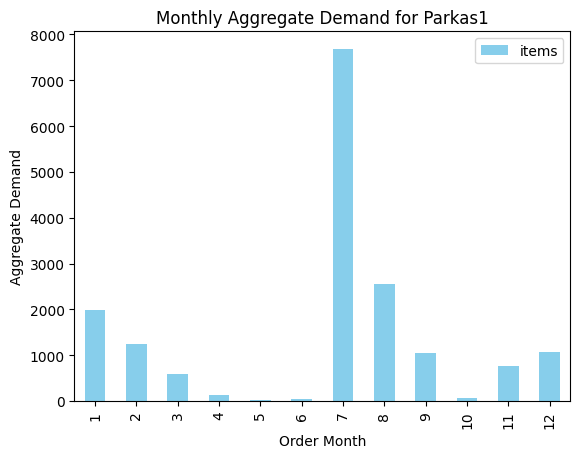

In [14]:
#By order date
df['ORDER_MONTH'] = df['order_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand2 = df.groupby('ORDER_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand2.plot(kind='bar', x='ORDER_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas1')
plt.xlabel('Order Month')
plt.ylabel('Aggregate Demand')
plt.show()

In [15]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'DELIVERY_MONTH',
       'ORDER_MONTH'],
      dtype='object')

### Delivery season

<Figure size 1200x600 with 0 Axes>

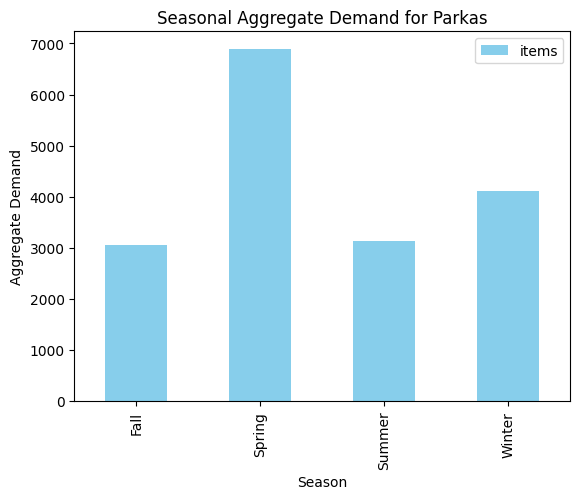

In [16]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()


### Order season

Order in Autumn

<Figure size 1200x600 with 0 Axes>

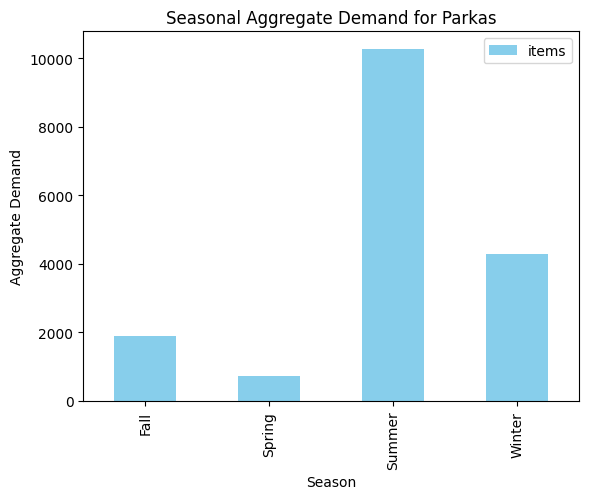

In [17]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['ORDER_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()

In [18]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'DELIVERY_MONTH',
       'ORDER_MONTH', 'SEASON'],
      dtype='object')

### Order time at almost the least prices which is July to Aug

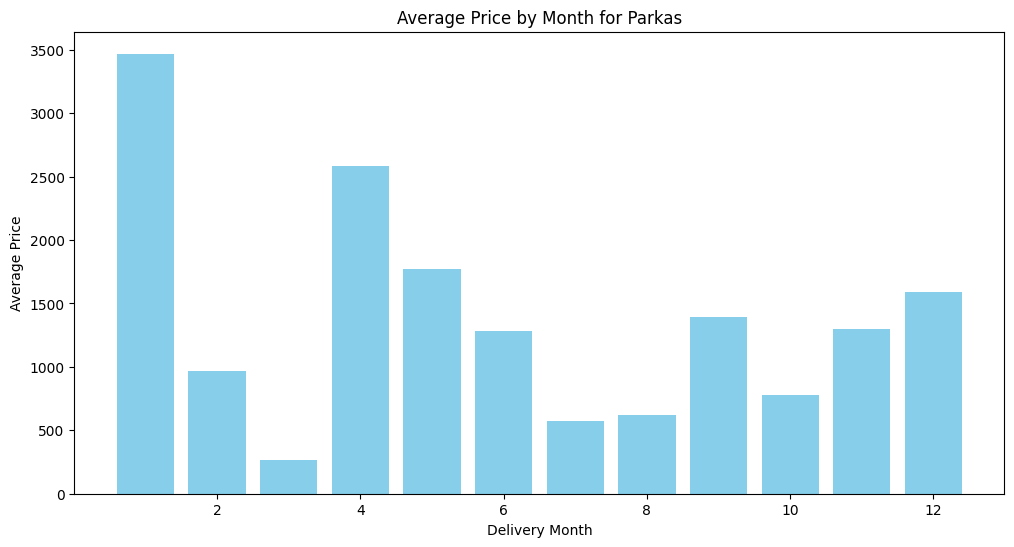

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided structure

# Aggregate Average Price by Month
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Calculate average price by month
average_price_by_month = df.groupby('DELIVERY_MONTH')['value'].mean().reset_index()

# Plotting Average Price by Month
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_month['DELIVERY_MONTH'], average_price_by_month['value'], color='skyblue')
plt.title('Average Price by Month for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Average Price')
plt.show()

### Summer  Jun to Aug is at the least price point

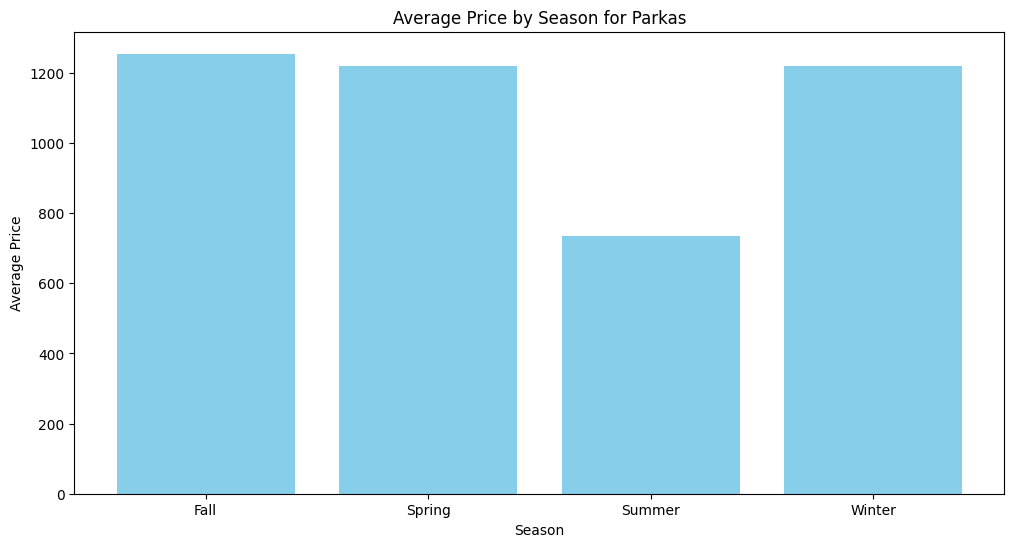

In [20]:
# Aggregate Average Price by Season
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate average price by season
average_price_by_season = df.groupby('SEASON')['value'].mean().reset_index()

# Plotting Average Price by Season
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_season['SEASON'], average_price_by_season['value'], color='skyblue')
plt.title('Average Price by Season for Parkas')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

In [21]:
# Calculate sales for each product
#df['Sales'] = df['value'] * df['items']

# Group by product code and sum the sales
#product_sales = df.groupby('Product Code')['Sales'].sum().reset_index()

# Display the result
#print(product_sales)


In [22]:
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Create a 'SEASON' column based on 'DELIVERY_MONTH'
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate monthly and seasonal quantity for each product
monthly_quantity = df.groupby(['Product Code', 'requested_delivery_date'])['items'].sum().reset_index()
seasonal_quantity = df.groupby(['Product Code', 'SEASON'])['items'].sum().reset_index()

# Display the results
print("Monthly Quantity:")
print(monthly_quantity)

print("\nSeasonal Quantity:")
print(seasonal_quantity)


Monthly Quantity:
    Product Code requested_delivery_date  items
0      L10705000              2010-01-28     25
1      L10705000              2010-02-01     73
2      L10705000              2010-02-04     45
3      L10705000              2010-02-22      2
4      L10705000              2010-03-01      5
..           ...                     ...    ...
725    L12919200              2012-05-25     12
726    L12919200              2012-05-30     23
727    L12919200              2012-05-31     15
728    L12919200              2012-06-01      2
729    L12919200              2012-06-30     15

[730 rows x 3 columns]

Seasonal Quantity:
    Product Code  SEASON  items
0      L10705000  Spring     59
1      L10705000  Winter    145
2      L10705100  Spring      4
3      L10705100  Summer      8
4      L10705100  Winter     83
..           ...     ...    ...
104    L12919100  Summer     17
105    L12919100  Winter     19
106    L12919200  Spring    428
107    L12919200  Summer     17
108    L12

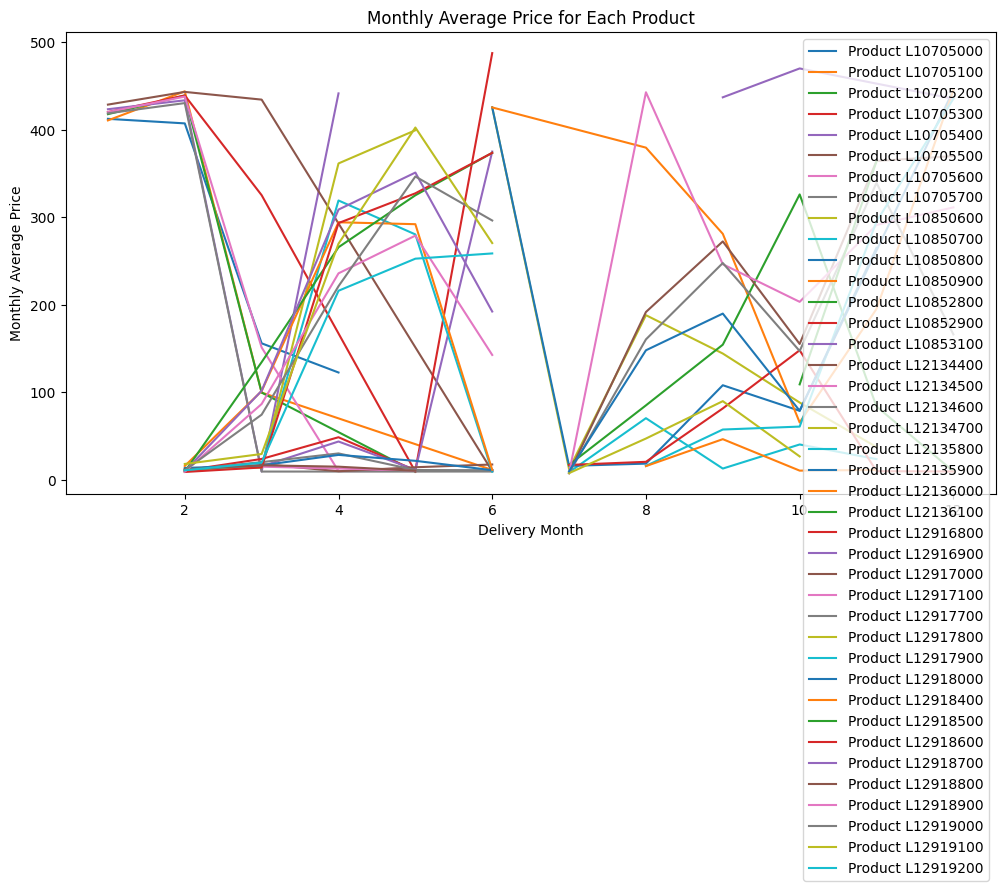

In [23]:
# Calculate monthly average price for each product
df['Monthly Average Price'] = df['value'] / df['items']

# Group by product code and month, then calculate the mean of the monthly average price
monthly_avg_price = df.groupby(['Product Code', 'DELIVERY_MONTH'])['Monthly Average Price'].mean().reset_index()

# Create a line chart for each product
plt.figure(figsize=(12, 6))

# Iterate through unique product codes
for product_code in monthly_avg_price['Product Code'].unique():
    product_data = monthly_avg_price[monthly_avg_price['Product Code'] == product_code]
    plt.plot(product_data['DELIVERY_MONTH'], product_data['Monthly Average Price'], label=f'Product {product_code}')

# Set labels and title
plt.title('Monthly Average Price for Each Product')
plt.xlabel('Delivery Month')
plt.ylabel('Monthly Average Price')

# Display legend
plt.legend()

# Show the line chart
plt.show()

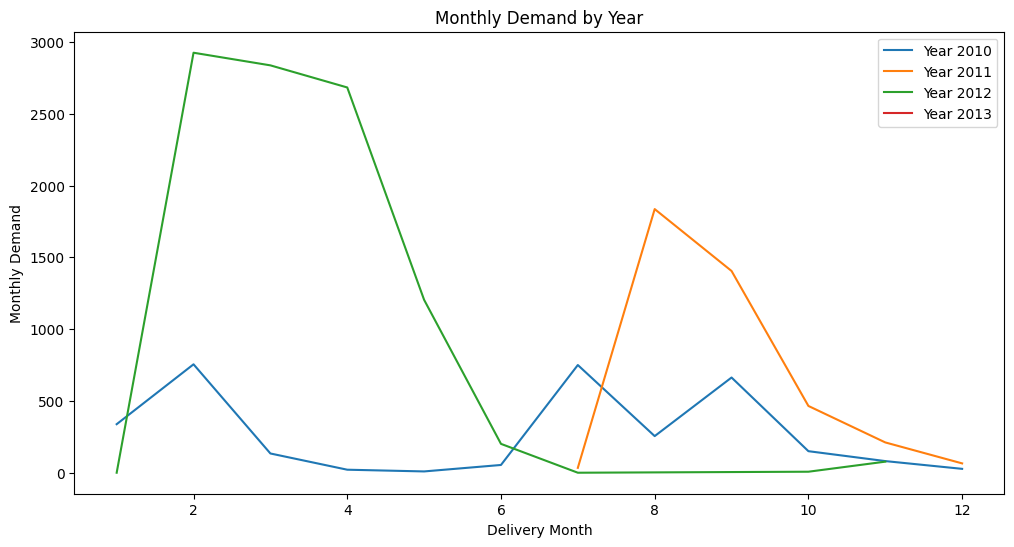

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by year and month
monthly_demand_by_year = df.groupby(['DELIVERY_YEAR', 'DELIVERY_MONTH'])['items'].sum().reset_index()

# Create a line chart for monthly demand by year
plt.figure(figsize=(12, 6))

# Iterate through unique years
for year in monthly_demand_by_year['DELIVERY_YEAR'].unique():
    year_data = monthly_demand_by_year[monthly_demand_by_year['DELIVERY_YEAR'] == year]
    plt.plot(year_data['DELIVERY_MONTH'], year_data['items'], label=f'Year {year}')

# Set labels and title
plt.title('Monthly Demand by Year')
plt.xlabel('Delivery Month')
plt.ylabel('Monthly Demand')

# Display legend
plt.legend()

# Show the line chart
plt.show()


In [25]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by year and month
monthly_demand_by_year = df.groupby(['DELIVERY_YEAR', 'DELIVERY_MONTH'])['items'].sum().reset_index()

# Display the table
print(monthly_demand_by_year)


    DELIVERY_YEAR  DELIVERY_MONTH  items
0            2010               1    338
1            2010               2    755
2            2010               3    134
3            2010               4     21
4            2010               5      9
5            2010               6     54
6            2010               7    750
7            2010               8    255
8            2010               9    663
9            2010              10    150
10           2010              11     81
11           2010              12     27
12           2011               7     34
13           2011               8   1836
14           2011               9   1405
15           2011              10    465
16           2011              11    211
17           2011              12     65
18           2012               1      0
19           2012               2   2925
20           2012               3   2837
21           2012               4   2683
22           2012               5   1204
23           201

In [26]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Define seasons based on months
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter',
}

# Map the seasons to each month
df['SEASON'] = df['DELIVERY_MONTH'].map(seasons)

# Aggregate demand by year and season
seasonal_demand_by_year = df.groupby(['DELIVERY_YEAR', 'SEASON'])['items'].sum().reset_index()

# Display the table
print(seasonal_demand_by_year)


    DELIVERY_YEAR  SEASON  items
0            2010    Fall    894
1            2010  Spring    164
2            2010  Summer   1059
3            2010  Winter   1120
4            2011    Fall   2081
5            2011  Summer   1870
6            2011  Winter     65
7            2012    Fall     84
8            2012  Spring   6724
9            2012  Summer    201
10           2012  Winter   2925
11           2013  Spring      4


In [27]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [28]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand,DELIVERY_MONTH,ORDER_MONTH,SEASON,Monthly Average Price,DELIVERY_YEAR
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,1,7,Winter,389.50,2010
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1,3,7,Spring,441.75,2010
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1,2,7,Winter,427.50,2010
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1,2,7,Winter,451.25,2010
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1,2,7,Winter,441.75,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1,2,7,Winter,10.71,2012


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming monthly_demand_by_year is your DataFrame

# Extract the relevant columns
X = monthly_demand_by_year[['DELIVERY_YEAR', 'DELIVERY_MONTH']]
y = monthly_demand_by_year['items']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the values based on the linear regression model
monthly_demand_by_year['Predicted_Items'] = model.predict(X)

# Display the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display the original data and the predicted values
print(monthly_demand_by_year[['DELIVERY_YEAR', 'DELIVERY_MONTH', 'items', 'Predicted_Items']])




Coefficients: [249.67391482 -76.02233386]
Intercept: -500960.92581677705
    DELIVERY_YEAR  DELIVERY_MONTH  items  Predicted_Items
0            2010               1    338       807.620633
1            2010               2    755       731.598299
2            2010               3    134       655.575965
3            2010               4     21       579.553631
4            2010               5      9       503.531297
5            2010               6     54       427.508963
6            2010               7    750       351.486630
7            2010               8    255       275.464296
8            2010               9    663       199.441962
9            2010              10    150       123.419628
10           2010              11     81        47.397294
11           2010              12     27       -28.625040
12           2011               7     34       601.160544
13           2011               8   1836       525.138211
14           2011               9   1405       449.115877

### Linear regression

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int64         
 12  DELIVERY_MONTH           2420 non-

In [32]:
df['Curr'].unique()

array(['RUB', 'DKK', 'NOK', 'EUR', 'CHF', 'SEK', 'CZK', 'PLN', 'GBP'],
      dtype=object)

In [33]:
pip install forex-python

     |████████████████████████████████| 75 kB 1.5 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [34]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand,DELIVERY_MONTH,ORDER_MONTH,SEASON,Monthly Average Price,DELIVERY_YEAR
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,1,7,Winter,389.50,2010
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1,3,7,Spring,441.75,2010
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1,2,7,Winter,427.50,2010
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1,2,7,Winter,451.25,2010
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1,2,7,Winter,441.75,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1,2,7,Winter,10.71,2012
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1,2,7,Winter,10.71,2012


In [35]:
import pandas as pd

# Assuming df is your DataFrame

# Select the columns to combine
columns_to_combine = ['items', 'DELIVERY_MONTH', 'DELIVERY_YEAR']

# Create df2 by combining selected columns
df2 = df[columns_to_combine].copy()

# Display the new DataFrame
print(df2)


      items  DELIVERY_MONTH  DELIVERY_YEAR
0         6               1           2010
1        23               3           2010
2         7               2           2010
3         9               2           2010
4         5               2           2010
...     ...             ...            ...
2415     12               2           2012
2416     12               2           2012
2417     12               2           2012
2418     10               2           2012
2419     10               4           2012

[2420 rows x 3 columns]


In [36]:
import pandas as pd

# Assuming df is your DataFrame

# Aggregate monthly 'items' by year
df3 = df.groupby(['DELIVERY_YEAR', 'DELIVERY_MONTH'])['items'].sum().reset_index()

# Display the new DataFrame
print(df3)


    DELIVERY_YEAR  DELIVERY_MONTH  items
0            2010               1    338
1            2010               2    755
2            2010               3    134
3            2010               4     21
4            2010               5      9
5            2010               6     54
6            2010               7    750
7            2010               8    255
8            2010               9    663
9            2010              10    150
10           2010              11     81
11           2010              12     27
12           2011               7     34
13           2011               8   1836
14           2011               9   1405
15           2011              10    465
16           2011              11    211
17           2011              12     65
18           2012               1      0
19           2012               2   2925
20           2012               3   2837
21           2012               4   2683
22           2012               5   1204
23           201

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming df3 is your aggregated DataFrame

# Select features and target variable
features = ['DELIVERY_YEAR', 'DELIVERY_MONTH']
target = 'items'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 644387.5038325005
R-squared: 0.26682539809857686


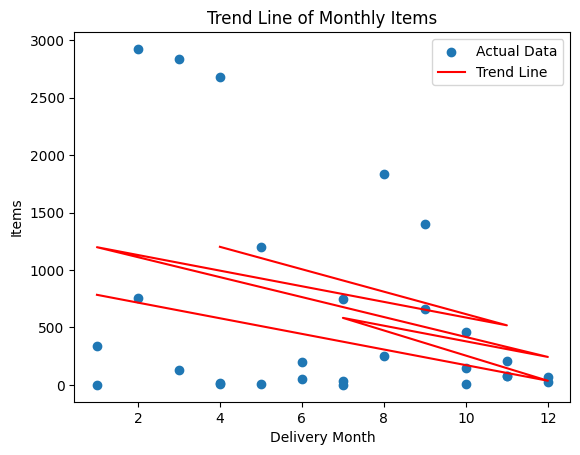

In [38]:
plt.scatter(df3['DELIVERY_MONTH'], df3['items'], label='Actual Data')

# Plot the trend line
plt.plot(df3['DELIVERY_MONTH'], model.predict(df3[features]), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Delivery Month')
plt.ylabel('Items')
plt.title('Trend Line of Monthly Items')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [39]:
import pandas as pd

# Assuming df3 is your aggregated DataFrame

# Merge 'DELIVERY_YEAR' and 'DELIVERY_MONTH' columns and format as 'yyyy-mm'
df3['Delivery Month'] = df3['DELIVERY_YEAR'].astype(str) + '-' + df3['DELIVERY_MONTH'].astype(str).str.zfill(2)

# Display the updated DataFrame
print(df3[['DELIVERY_YEAR', 'DELIVERY_MONTH', 'items', 'Delivery Month']])


    DELIVERY_YEAR  DELIVERY_MONTH  items Delivery Month
0            2010               1    338        2010-01
1            2010               2    755        2010-02
2            2010               3    134        2010-03
3            2010               4     21        2010-04
4            2010               5      9        2010-05
5            2010               6     54        2010-06
6            2010               7    750        2010-07
7            2010               8    255        2010-08
8            2010               9    663        2010-09
9            2010              10    150        2010-10
10           2010              11     81        2010-11
11           2010              12     27        2010-12
12           2011               7     34        2011-07
13           2011               8   1836        2011-08
14           2011               9   1405        2011-09
15           2011              10    465        2011-10
16           2011              11    211        

Mean Squared Error: 760087.5202920447
R-squared: 0.13518362509212145


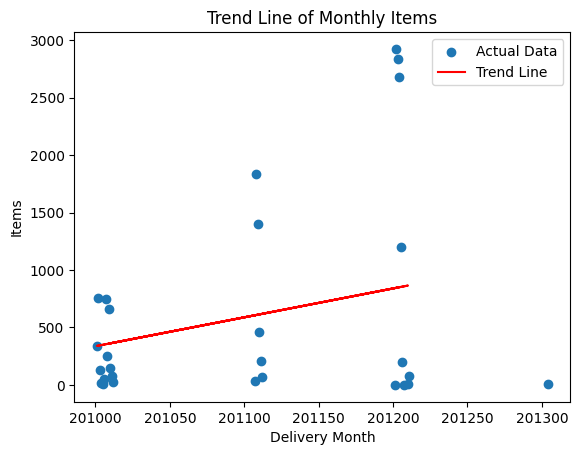

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df3 is your aggregated DataFrame

# Create 'Delivery Month' column by merging 'DELIVERY_YEAR' and 'DELIVERY_MONTH'
df3['Delivery Month'] = df3['DELIVERY_YEAR'].astype(str) + '-' + df3['DELIVERY_MONTH'].astype(str).str.zfill(2)

# Select features and target variable
features = ['Delivery Month']
target = 'items'

# Convert 'Delivery Month' to numerical representation (e.g., 2022-01 to 202201)
df3['Delivery Month'] = pd.to_datetime(df3['Delivery Month']).dt.strftime('%Y%m').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual data points
plt.scatter(df3['Delivery Month'], df3['items'], label='Actual Data')

# Plot the trend line
plt.plot(X_test, y_pred, color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Delivery Month')
plt.ylabel('Items')
plt.title('Trend Line of Monthly Items')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [41]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [42]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [43]:
import numpy as np
from pmdarima.arima import auto_arima

X = np.array(df3['items']).reshape(-1, 1)

arima_model = auto_arima(df3['Delivery Month'], exogenous=X, start_p=1, start_q=1, max_p=5,
                         max_q=5, d=None, trace=True, test='adf',
                         error_action='ignore', suppress_warnings=True,
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=269.978, Time=0.54 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=267.627, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=268.123, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=268.014, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=269.422, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.720 seconds


In [44]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -132.813
Date:                Mon, 11 Dec 2023   AIC                            267.627
Time:                        17:08:46   BIC                            268.885
Sample:                             0   HQIC                           267.989
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1601.1389    305.833      5.235      0.000    1001.718    2200.560
Ljung-Box (L1) (Q):                             4.81   Jarque-Bera (JB):                 5.32
Prob(Q):                             

In [45]:
#consider Seasonality
import numpy as np
from pmdarima.arima import auto_arima

X = np.array(df3['items']).reshape(-1, 1)

arima_model = auto_arima(df3['Delivery Month'],exogenous=X
                         , start_p=1
                         , start_q=1
                         , max_p=3
                         , max_q=3
                         , m=12
                         , seasonal = True
                         , d=1
                         , start_P=0
                         , D=1
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=156.080, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=155.876, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=154.081, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=154.080, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=157.875, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=156.082, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=156.083, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=154.081, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=158.084, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=152.080, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=154.081, Time=0.31 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=154.080, Time=0.88 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=152.081, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=156.080, Time=0.73 sec
 ARIMA(1,1,0)(0,1,1)[12]         

This output is the result of a stepwise search to find the best ARIMA model that minimizes the Akaike Information Criterion (AIC), which is a measure of the goodness of fit of a statistical model. Each line represents a different ARIMA model configuration, and the information includes the order of the autoregressive (p), differencing (d), and moving average (q) components, as well as any seasonal components.

Let's break down the information for the best model:

- **Best model:** ARIMA(0,1,0)(0,1,1)[12]

This indicates that the best model is a non-seasonal ARIMA model with the following components:
  - p (autoregressive order): 0
  - d (differencing order): 1
  - q (moving average order): 0
  - Seasonal components:
    - P (seasonal autoregressive order): 0
    - D (seasonal differencing order): 1
    - Q (seasonal moving average order): 1
    - Seasonal period: 12 (monthly data)

The model fitting time for this configuration is also provided.

The best model is chosen based on the lowest AIC value, indicating a good balance between model complexity and goodness of fit. The lower the AIC, the better the model is considered.